<a href="https://colab.research.google.com/github/AurelioNaufal/latihan2/blob/main/Latihan_2_Kelompok_6_KompStat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kelompok 6
1. Adawia Ananda - 2106724883
2. Aurelio Naufal Effendy - 2106638526
3. Favian Sulthan Wafi - 2106706205
4. Myra Azzahra Putri Syah Indra - 2106726844
5. Rifqi Hafizuddin - 2106638204



**Gaussian Mixture Model**

Gaussian Mixture Models (GMM) efektif untuk representasi densitas multimodel. Pada eksperimen ini Parameter GMM diestimasi dengan menggunakan algoritma Expectation Maximization (EM) yang hasilnya ditampilkan untuk dataset yang diberikan pada link berikut: https://archive.ics.uci.edu/ml/datasets/iris

Pertanyaan:

A. Cobalah lakukan pengelompokan pada data 2d:
a. PetalLenght vs Petal witdh
b. SepalLenght vs Sepal width

 dan lihat apakah dapat menghasilkan cluster yang sebenarnya? (bayangkan kita tidak memiliki label spesies pada data ini dan ingin membagi bunga menjadi beberapa spesies)

Anda boleh memodifikasi jumlah cluster yang berubah-ubah dengan pendekatan berikut:
1. Pendekatan K-Means Clustering
2. Pendekatan GMM 
3. Pendekatan GMM menggunakan EM

B. Prediksi cluster untuk setiap titik data untuk pendekatan K-Means Clustering dan GMM pada ke dua data 2D di atas. Analisalah hasil perbandingan dari K-Means Clustering dan GMM Clustering.



Model campuran Gaussian dengan struktur kovarians yang berbeda:
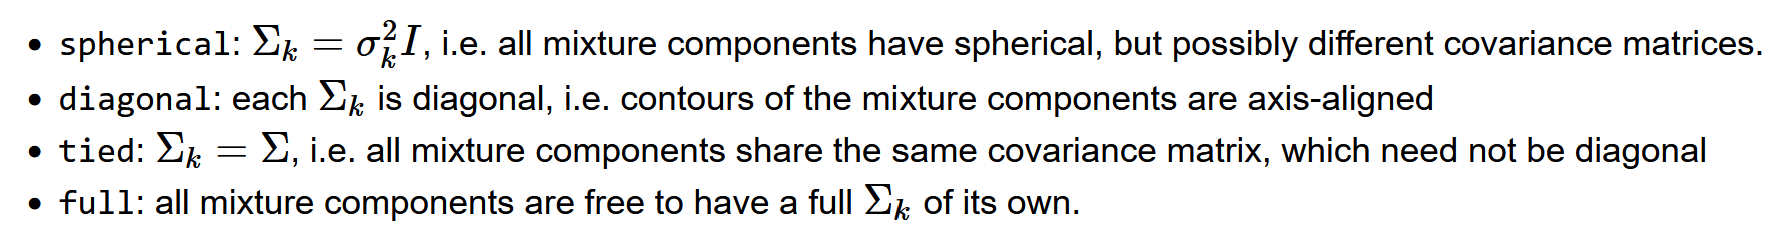

# Import

In [209]:
#Import modul
from sklearn import cluster, datasets
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [210]:
url = 'https://raw.githubusercontent.com/gianiarda/latihan2/main/Iris.csv'
data = pd.read_csv(url)

In [211]:
print(data)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [212]:
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,35,4.9,3.1,1.5,0.1,Iris-setosa
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
122,123,7.7,2.8,6.7,2.0,Iris-virginica
86,87,6.7,3.1,4.7,1.5,Iris-versicolor


In [213]:
# split data into features (X) and labels (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm
143  144            6.8           3.2            5.9
142  143            5.8           2.7            5.1
112  113            6.8           3.0            5.5
68    69            6.2           2.2            4.5
36    37            5.5           3.5            1.3
90     Iris-versicolor
89     Iris-versicolor
48         Iris-setosa
122     Iris-virginica
26         Iris-setosa
Name: Species, dtype: object


In [214]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# see how many samples we have of each species 
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Pengelompokkan Sepal dan Petal

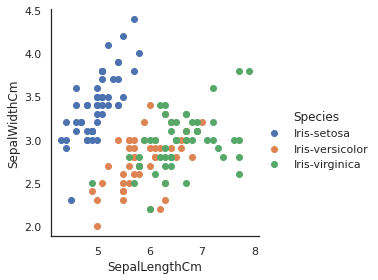

In [215]:
# use seaborn to make scatter plot showing species for each sample
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

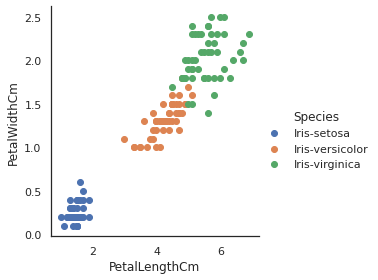

In [216]:
# do same for petals
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

# Mencoba n Cluster = 3

In [217]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

In [218]:
# try clustering on the 4d data and see if can reproduce the actual clusters.

# ie imagine we don't have the species labels on this data and wanted to
# divide the flowers into species. could set an arbitrary number of clusters
# and try dividing them up into similar clusters.

# we happen to know there are 3 species, so let's find 3 species and see
# if the predictions for each point matches the label in y.

from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

**Silhouette score** - a value near +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [219]:
#silhouette score
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.4262689752753905

In [220]:
from sklearn.mixture import GaussianMixture

In [221]:
#load iris data; pairwise plots
iris = datasets.load_iris()

In [222]:
#Contoh Pendekatan GMM dengan EM
# Contoh Mencoba GMM dengan jenis covarians yang berbeda pada data 2d
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,2:4]) ## fits mixture model menggunakan EM

In [223]:
#define colors
colors = ['navy', 'turquoise', 'darkorange']
markers = ['+','*','x']


In [224]:
#helper function to visualise covariance structure of fitted Gaussian components
from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

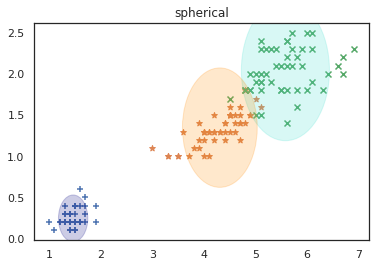

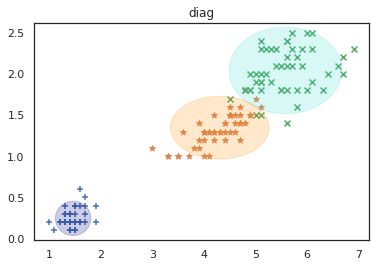

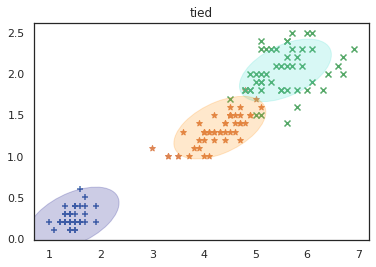

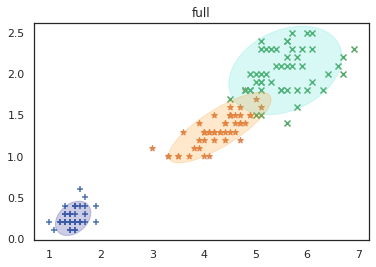

In [225]:
#Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()


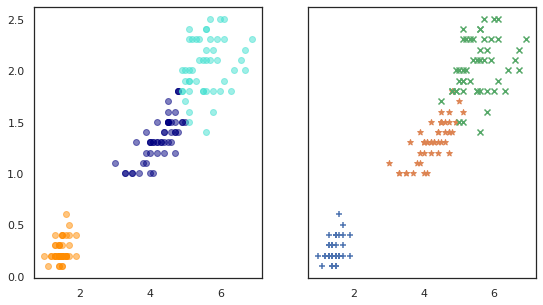

In [226]:
# Visualisasi K-means
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(iris.data[:,2:4])
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9,5))
for n in range(kmeans.n_clusters):
    data_kmeanslabels = iris.data[kmeans.labels_ == n]
    ax1.scatter(data_kmeanslabels[:, 2], data_kmeanslabels[:, 3], color=colors[n], alpha=0.5)
    data_truelabels = iris.data[iris.target == n]
    ax2.scatter(data_truelabels[:, 2], data_truelabels[:, 3], marker=markers[n])
plt.show()

In [227]:
# Metode GMM
gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled) #karena predict arraynya dapat berubah setiap run
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [228]:
from sklearn.metrics.cluster import adjusted_rand_score

#Akan dicari rand point untuk metode k-means clustering dan gmm

#k-means
score_kmeans = adjusted_rand_score(y, y_cluster_kmeans)
print('Score K-Means : ',score_kmeans) 
#gmm
score_gmm = adjusted_rand_score(y, y_cluster_gmm)
print('Score GMM : ',score_gmm)

Score K-Means :  0.7222043170868028
Score GMM :  1.0


# Mencoba n Cluster = 2

In [229]:
nclusters = 2 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [230]:
#silhouette score
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.545023998832265

In [231]:
# Metode pendekatan GMM dengan EM
estimators = dict((cov_type, GaussianMixture(n_components=4,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,2:4]) ## fits mixture model menggunakan EM

In [232]:
#define colors
colors = ['navy', 'turquoise']
markers = ['+','*']

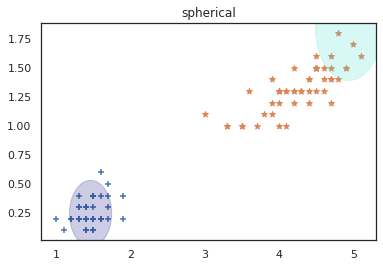

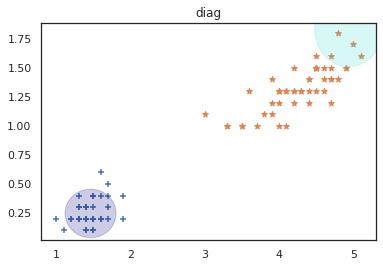

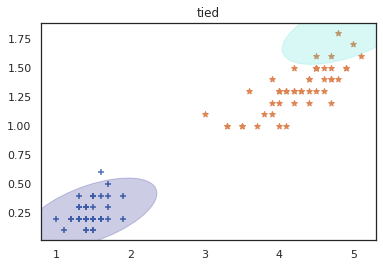

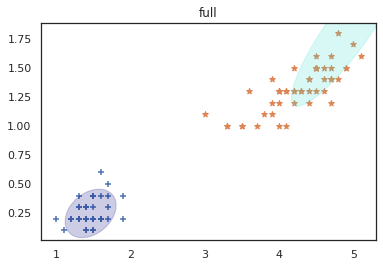

In [233]:
# Visualisasi GMM dengan EM
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()


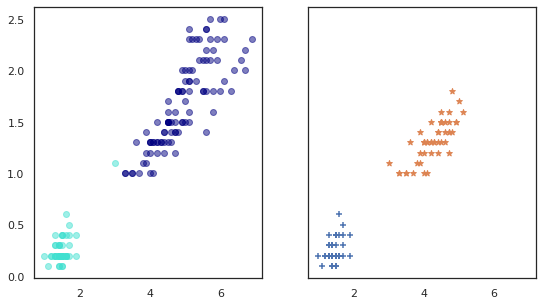

In [234]:
# Visualisasi K-Means
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(iris.data[:,2:4])
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9,5))
for n in range(kmeans.n_clusters):
    data_kmeanslabels = iris.data[kmeans.labels_ == n]
    ax1.scatter(data_kmeanslabels[:, 2], data_kmeanslabels[:, 3], color=colors[n], alpha=0.5)
    data_truelabels = iris.data[iris.target == n]
    ax2.scatter(data_truelabels[:, 2], data_truelabels[:, 3], marker=markers[n])
plt.show()

In [235]:
# Metode GMM
gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [236]:
from sklearn.metrics.cluster import adjusted_rand_score

#akan dicari rand point untuk metode k-means clustering dan gmm

#k-means
score_kmeans = adjusted_rand_score(y, y_cluster_kmeans)
print('Score K-Means : ',score_kmeans)
#gmm 
score_gmm = adjusted_rand_score(y, y_cluster_gmm)
print('Score GMM : ',score_gmm)

Score K-Means :  0.5681159420289855
Score GMM :  0.5681159420289855


# Mencoba n Cluster = 4

In [237]:
nclusters = 4 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2,
       3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [238]:
#silhouette score
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.3917188004502908

In [239]:
# Metode pendekatan GMM dengan EM
estimators = dict((cov_type, GaussianMixture(n_components=4,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,2:4]) ## fits mixture model menggunakan EM

In [240]:
#define colors
colors = ['navy', 'turquoise', 'darkorange','blue']
markers = ['+','*','x','d']

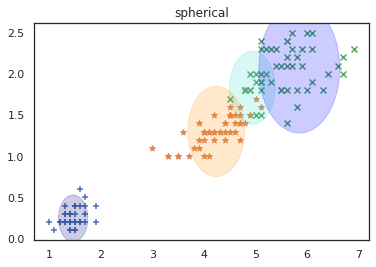

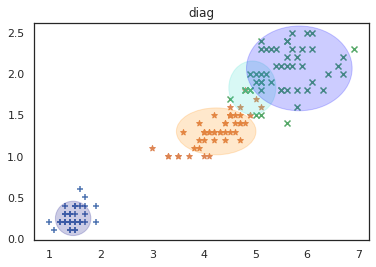

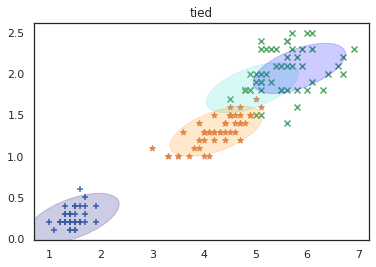

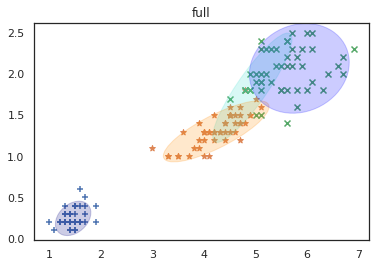

In [241]:
# Visualisasi GMM dengan EM
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()


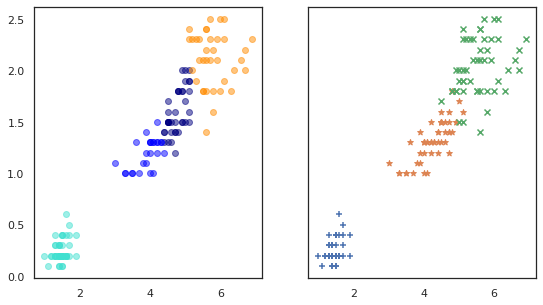

In [242]:
# Visualisasi K-means
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(iris.data[:,2:4])
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9,5))
for n in range(kmeans.n_clusters):
    data_kmeanslabels = iris.data[kmeans.labels_ == n]
    ax1.scatter(data_kmeanslabels[:, 2], data_kmeanslabels[:, 3], color=colors[n], alpha=0.5)
    data_truelabels = iris.data[iris.target == n]
    ax2.scatter(data_truelabels[:, 2], data_truelabels[:, 3], marker=markers[n])
plt.show()

In [243]:
# Metode GMM
gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled) #array akan berubah-ubah karena di predict
y_cluster_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 0, 3, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [244]:
from sklearn.metrics.cluster import adjusted_rand_score

#akan dicari rand point untuk metode k-means clustering dan gmm

#k-means
score_kmeans = adjusted_rand_score(y, y_cluster_kmeans)
print('Score K-Means : ',score_kmeans) 
#gmm
score_gmm = adjusted_rand_score(y, y_cluster_gmm)
print('Score GMM : ',score_gmm)

Score K-Means :  0.7717785486364541
Score GMM :  0.9232303007200694


##Kesimpulan
**Pertanyaan**: Inferensi apa yang didapat dari silhouette score dan visualisasi di atas?

**Jawaban**: Diperoleh *silhouette score* (kmeans) dari data tersebut adalah:

0.545023998832265 untuk n cluster = 2

0.4262689752753905 untuk n cluster = 3

0.3917188004502908 untuk n cluster = 4

Diperoleh *rand score* (GMM) dari data tersebut adalah:

0.5681159420289855 untuk n cluster = 2

0.4808350017427592 untuk n cluster = 3

0.8710957310342771 untuk n cluster = 4

Dapat disimpulkan bahwa n cluster = 2 menciptakan cluster yang paling terpisah antara satu sama lain. Sementara, pada n cluster = 3 dan 4, masih terlihat tumpang tindih antar cluster.

Dapat dilihat juga bahwa rand score dari n cluster = 4 memiliki nilai mendekati 1, 

Berdasarkan pengamatan dari scatterplot, dapat dilihat bahwa iris versicolor dan virginica memiliki kemiripan. Sehingga pada cluster n=2, kedua spesies tersebut digolongkan dalam cluster yang sama.